# Import package

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Import Data

In [9]:
with open('iris.data','r') as file:
    iris = pd.read_csv(file,names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])
with open('house-votes-84.data','r') as file:
    vote = pd.read_csv(file,names = ['Class Name','handicapped-infants','water-project-cost-sharing',
                                     'adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
                                    'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras',
                                    'mx-missile','immigration','synfuels-corporation-cutback','education-spending',
                                    'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'])


In [6]:
# iris_label.head()

NameError: name 'iris_label' is not defined

# Preprocessing

In [10]:
iris_label = iris.iloc[:,-1]
iris = iris.iloc[:,0:-1]
vote_label = vote.iloc[:,0]
vote = vote.iloc[:,1:]

mapping = {
    'y':1,
    'n':0}
for i in vote.keys():
    vote[i] = vote[i].map(mapping)
vote = vote.fillna(vote.median())

iris = (iris - iris.min()) / (iris.max() - iris.min())

# K-Means

### Iris

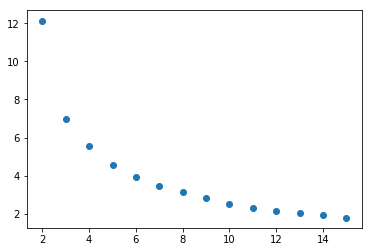

In [50]:
iris_sse = []
for i in range(2,16):
    kmeans_iris = KMeans(n_clusters=i, init='k-means++',random_state=0).fit(iris)
    iris_sse.append(kmeans_iris.inertia_)


plt.scatter(list(range(2,16)),iris_sse)
plt.show()




#### Comment
Determing the best number of clusters by useing elbow, the x-axis is number of cluster, and the y-axis is sum of square error, the best number of cluster is 3.


### Vote

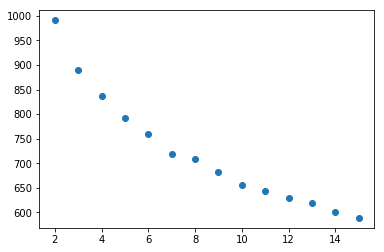

In [49]:
vote_sse = []
for i in range(2,16):
    kmeans_vote = KMeans(n_clusters=i, init='k-means++',random_state=0).fit(vote)
    vote_sse.append(kmeans_vote.inertia_)

    
plt.scatter(list(range(2,16)),vote_sse)
plt.show()

#### Comment
Determing the best number of clusters by useing elbow, the x-axis is number of cluster, and the y-axis is sum of square error, the best number of cluster is 3. 

However, this method is not clearly enough to determine the best number of clusters.

# GaussianMixture

### Iris

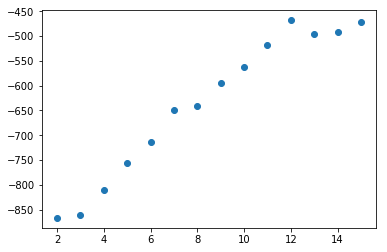

In [46]:
iris_bic = []
for i in range(2,16):
    gaussian = mixture.GaussianMixture(n_components=i,random_state=0).fit(iris)
    iris_bic.append(gaussian.bic(iris))
    
plt.scatter(list(range(2,16)),iris_bic)
plt.show()

#### Comment
Determing the best number of clusters by useing BIC score, the x-axis is number of cluster, and the y-axis is BIC score, the best number of cluster is 2. 

### Vote

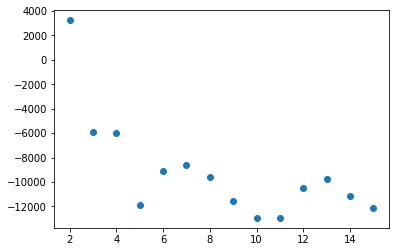

In [43]:
vote_bic = []
for i in range(2,16):
    gaussian = mixture.GaussianMixture(n_components=i, random_state=0).fit(vote)
    vote_bic.append(gaussian.bic(vote))
    

plt.scatter(list(range(2,16)),vote_bic)
plt.show()

#### Comment
Determing the best number of clusters by useing BIC score, the x-axis is number of cluster, and the y-axis is BIC score, the best number of cluster is 10.Because 10 is the lowest score point.

However, the BIC scatter plot is not follow one tendency. Therefore, it is not a good method to find the best number.

# Hierarchical Clustering

### Iris

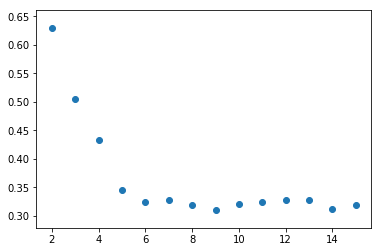

In [36]:
silhouette_iris = []

for i in range(2,16):
    Hierarchical_iris = cluster.AgglomerativeClustering(n_clusters=i).fit_predict(iris)
    silhouette_iris.append(silhouette_score(iris,Hierarchical_iris))
plt.scatter(list(range(2,16)),silhouette_iris)
plt.show()

#### Comment
Determing the best number of clusters by useing Silhouette score, the x-axis is number of cluster, and the y-axis is Silhouette score, the best number of cluster is 2.


### Vote

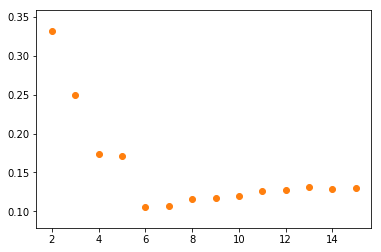

In [41]:
silhouette_vote = []

for i in range(2,16):
    Hierarchical_vote = cluster.AgglomerativeClustering(n_clusters=i).fit_predict(vote)
    silhouette_vote.append(silhouette_score(vote,Hierarchical_vote))
plt.scatter(list(range(2,16)),silhouette_vote)
plt.show()

#### Comment
Determing the best number of clusters by useing Silhouette score, the x-axis is number of cluster, and the y-axis is Silhouette score, the best number of cluster is 2.

# PCA

### Iris

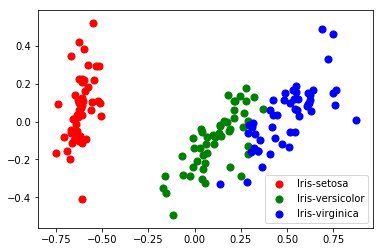

In [15]:
#iris

pca_iris = PCA(n_components = 2).fit_transform(iris)
pca_iris = pd.DataFrame(pca_iris)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_label == target
    plt.scatter(pca_iris.loc[indicesToKeep,[0]]
               , pca_iris.loc[indicesToKeep,[1]]
               , c = color
               , s = 50)
plt.legend(targets)
plt.show()

### Vote

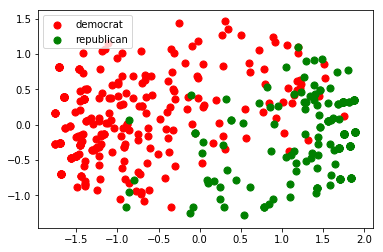

In [16]:
#vote

pca_vote = PCA(n_components = 2).fit_transform(vote)
pca_vote = pd.DataFrame(pca_vote)

targets = ['democrat', 'republican']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = vote_label == target
    plt.scatter(pca_vote.loc[indicesToKeep,[0]]
               , pca_vote.loc[indicesToKeep,[1]]
               , c = color
               , s = 50)
plt.legend(targets)
plt.show()

# Autoencoder (t-sne)

### Iris

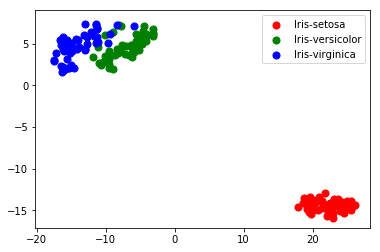

In [26]:
tsne_iris = TSNE(n_components=2,random_state=3).fit_transform(iris)
tsne_iris = pd.DataFrame(tsne_iris)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_label == target
    plt.scatter(tsne_iris.loc[indicesToKeep,[0]]
               , tsne_iris.loc[indicesToKeep,[1]]
               , c = color
               , s = 50)
plt.legend(targets)
plt.show()

### Vote

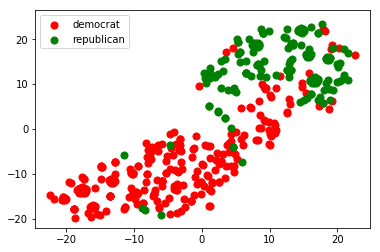

In [30]:
tsne_vote = TSNE(n_components=2,random_state=3).fit_transform(vote)
tsne_vote = pd.DataFrame(tsne_vote)

targets = ['democrat', 'republican']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = vote_label == target
    plt.scatter(tsne_vote.loc[indicesToKeep,[0]]
               , tsne_vote.loc[indicesToKeep,[1]]
               , c = color
               , s = 50)
plt.legend(targets)
plt.show()